In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# Step 1: Load the Dataset
data = pd.read_csv("Wholesale.csv")
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [16]:
# Step 2: Data Preprocessing
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

print("\nScaled Data:")
print(scaled_df)


Scaled Data:
      Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1    1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2    1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3   -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4    1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   
..        ...       ...       ...       ...       ...       ...   
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441   
439 -0.690297  0.590668 -0.729307 -0.555924 -0.573227 -0.620094   

     Detergents_Paper  Delicassen  
0           -0.043569   -0.066339  
1            0.086407    0.089151  
2            0.133232    2.243293  
3           -0.498588    0.093411  
4

In [17]:
# Split data into training and testing subsets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(scaled_data, test_size=0.3, random_state=42)

# Display results
print("Training Data:")
print(train_data)
print("\nTesting Data:")
print(test_data)

Training Data:
[[-0.69029709  0.59066829  0.63711984 ...  0.46834322 -0.51874599
  -0.21011416]
 [-0.69029709  0.59066829  0.47840788 ... -0.10660249 -0.58026916
  -0.09189908]
 [ 1.44865163  0.59066829 -0.60249573 ... -0.45862269  0.80767678
  -0.18881414]
 ...
 [-0.69029709  0.59066829 -0.67856665 ... -0.35695546 -0.356434
  -0.30525422]
 [-0.69029709  0.59066829  1.40131197 ...  2.07522161 -0.56683065
   0.24109116]
 [ 1.44865163  0.59066829 -0.71782906 ... -0.10536516  0.35517701
  -0.04929905]]

Testing Data:
[[-0.69029709 -1.99534212 -0.48217545 ...  1.46068136 -0.43076575
   0.74945151]
 [-0.69029709  0.59066829 -0.09770464 ... -0.20125818 -0.54184342
  -0.48204435]
 [ 1.44865163  0.59066829  1.21742774 ... -0.05422221  0.36525589
  -0.17851914]
 ...
 [ 1.44865163  0.59066829 -0.82872954 ... -0.58256184 -0.07905479
  -0.10254908]
 [ 1.44865163  0.59066829 -0.73057351 ... -0.07814391  0.78079976
  -0.14550411]
 [-0.69029709  0.59066829 -0.424865   ... -0.34705682 -0.21448976
   0

In [9]:
# Step 3: Perform Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
kmeans.fit(train_data)

KMeans(n_clusters=3, random_state=42)

In [18]:
# Predict clusters for both subsets
train_clusters = kmeans.predict(train_data)
test_clusters = kmeans.predict(test_data)
# Output clusters
print("Training Data Clusters:")
print(train_clusters)

print("\nTesting Data Clusters:")
print(test_clusters)

Training Data Clusters:
[2 2 1 0 0 1 2 0 2 2 0 0 1 1 1 2 1 0 1 1 2 1 1 1 1 2 2 0 0 0 0 0 2 2 1 0 2
 2 0 0 0 2 2 1 1 1 2 0 2 1 2 2 1 1 2 1 0 2 2 2 2 2 2 0 2 2 0 1 2 2 1 1 2 2
 1 0 1 2 1 1 2 1 2 1 1 2 2 0 0 2 1 0 0 0 2 0 1 0 2 2 0 2 0 0 1 2 0 0 2 1 2
 0 1 0 1 0 0 2 1 2 1 2 0 2 2 2 2 0 2 2 0 0 0 1 2 0 0 0 2 2 0 2 1 1 2 1 0 2
 0 1 2 1 2 1 0 2 1 1 1 1 1 2 2 1 0 2 2 0 2 0 2 2 1 0 2 0 2 2 0 2 1 0 2 0 1
 2 2 0 1 1 2 0 1 2 2 1 0 0 2 2 2 2 1 2 2 2 0 2 0 1 1 2 2 2 1 1 2 0 0 0 0 0
 2 1 2 2 1 2 0 1 2 1 0 2 1 0 2 1 1 1 1 2 1 2 0 2 2 0 2 2 1 0 1 1 2 2 2 1 0
 2 2 1 2 1 0 2 2 2 2 1 2 2 2 2 1 2 0 0 2 0 1 2 2 2 1 2 1 0 0 2 2 2 2 2 2 2
 0 0 2 2 2 1 2 1 0 2 2 1]

Testing Data Clusters:
[0 2 1 0 0 2 2 1 2 2 0 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 0 2 2 1 1 2 2 2 2 0
 1 2 0 2 2 0 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2
 2 2 2 2 1 2 0 2 2 1 2 1 2 2 1 0 2 2 1 2 1 2 2 2 2 2 0 2 1 1 2 2 2 1 2 2 0
 2 1 2 1 2 0 1 2 2 0 2 2 2 2 2 1 2 2 1 1 2]


In [11]:
# Step 4: Evaluate Performance
train_silhouette = silhouette_score(train_data, train_clusters)
test_silhouette = silhouette_score(test_data, test_clusters)

train_davies = davies_bouldin_score(train_data, train_clusters)
test_davies = davies_bouldin_score(test_data, test_clusters)

print("\nK-Means Clustering Performance:")
print(f"Training Silhouette Score: {train_silhouette:.3f}")
print(f"Testing Silhouette Score: {test_silhouette:.3f}")
print(f"Training Davies-Bouldin Index: {train_davies:.3f}")
print(f"Testing Davies-Bouldin Index: {test_davies:.3f}")



K-Means Clustering Performance:
Training Silhouette Score: 0.281
Testing Silhouette Score: 0.293
Training Davies-Bouldin Index: 1.291
Testing Davies-Bouldin Index: 1.176


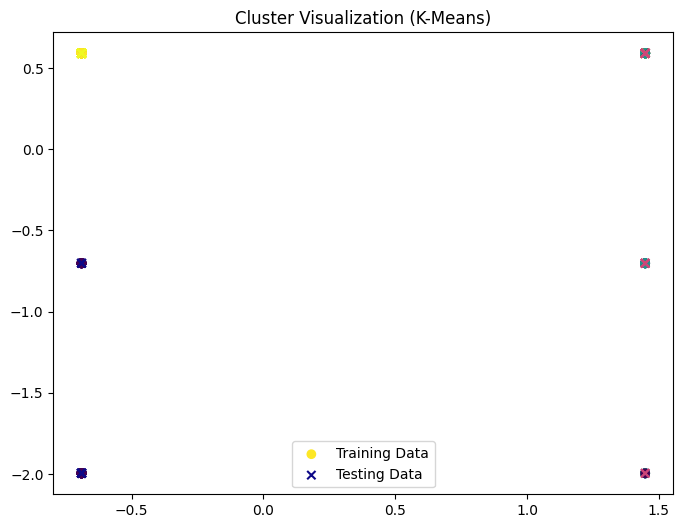

In [12]:
# Step 5: Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_clusters, cmap='viridis', label='Training Data')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_clusters, cmap='plasma', label='Testing Data', marker='x')
plt.title("Cluster Visualization (K-Means)")
plt.legend()
plt.show()

In [19]:
# (Optional) Compare with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_train_clusters = dbscan.fit_predict(train_data)
# Output clusters
print("DBSCAN Training Data Clusters:")
print(dbscan_train_clusters)

DBSCAN Training Data Clusters:
[-1  0 -1  4 -1 -1  0  1  0 -1 -1 -1 -1 -1 -1  0 -1  1 -1  2  0 -1 -1 -1
  2  0  0 -1 -1 -1  1 -1 -1  0 -1 -1 -1  0  3 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1  2  0 -1 -1 -1 -1 -1  1  0  0 -1 -1  0  0 -1  0 -1 -1 -1  0  0 -1 -1
  0  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1
 -1 -1 -1  0 -1 -1  0 -1  0 -1  3 -1 -1 -1 -1 -1 -1 -1  0  0  1 -1 -1 -1
  0 -1 -1  0 -1 -1  0 -1 -1 -1  4  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1
  0 -1 -1 -1  2  1 -1 -1  0 -1  1  0 -1 -1  0 -1 -1  0  0 -1 -1 -1  0 -1
 -1  0  0 -1 -1  1  0  0 -1 -1 -1  0 -1  0  3  0 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  0  4 -1 -1 -1  4 -1 -1 -1  0 -1 -1 -1
 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1 -1  0  0  0 -1 -1 -1  0  0 -1  0 -1 -1  0 -1  2 -1  0  0 -1 -1 -1 -1
  3 -1  0  0  0  0 -1 -1  3 -1  0  0 -1 -1 -1  2 -1  0 -1  2]


In [14]:

# Evaluate DBSCAN
if len(set(dbscan_train_clusters)) > 1:  # Avoid invalid silhouette score for single cluster
    dbscan_silhouette = silhouette_score(train_data, dbscan_train_clusters)
    dbscan_davies = davies_bouldin_score(train_data, dbscan_train_clusters)
    print("\nDBSCAN Performance:")
    print(f"Training Silhouette Score: {dbscan_silhouette:.3f}")
    print(f"Training Davies-Bouldin Index: {dbscan_davies:.3f}")


DBSCAN Performance:
Training Silhouette Score: -0.163
Training Davies-Bouldin Index: 1.534


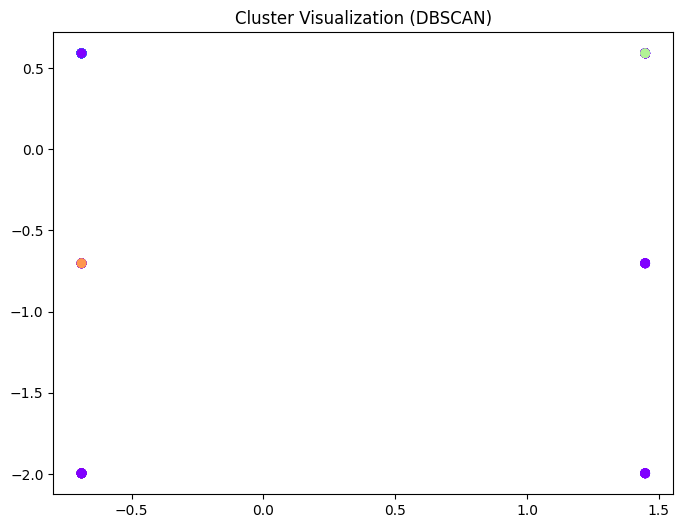

In [15]:
# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:, 0], train_data[:, 1], c=dbscan_train_clusters, cmap='rainbow', label='DBSCAN Clusters')
plt.title("Cluster Visualization (DBSCAN)")
plt.show()